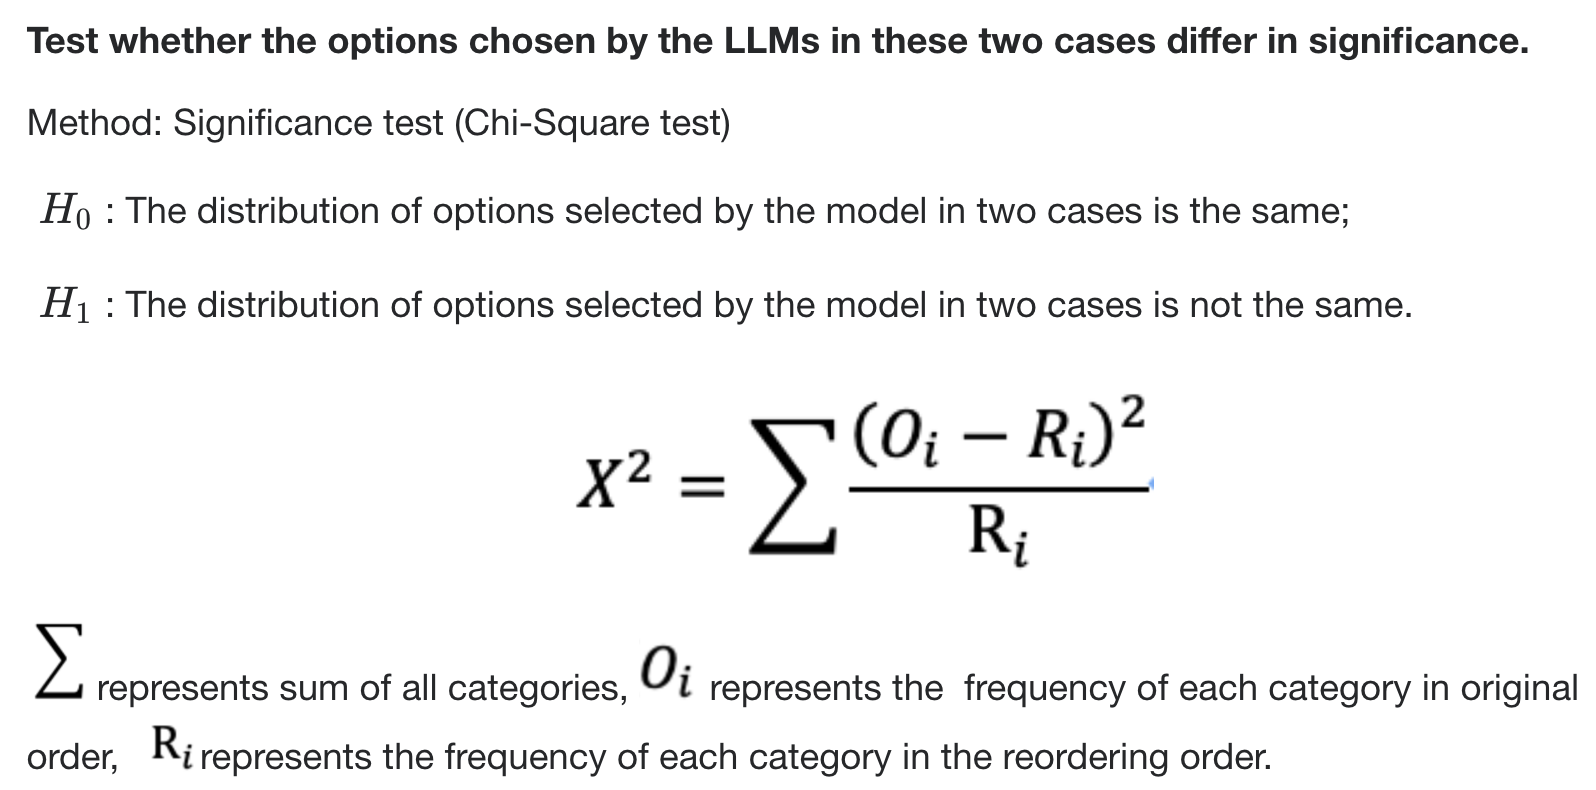

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

/Users/weirichen/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('Chi_1.csv')
data

,CARE_3_MC,CARE_3_MC_R,CARE_4_MC,CARE_4_MC_R,CARE_G_MC,CARE_G_MC_R,CARE_4_MC_1,CARE_4_MC_R_1,M3KE_3_MC,M3KE_3_MC_R,...,ARC_4_MC,ARC_4_MC_R,ARC_G_MC,ARC_G_MC_R,MATH_3_MC,MATH_3_MC_R,MATH_4_MC,MATH_4_MC_R,MATH_G_MC,MATH_G_MC_R
0,A,B,A,A,B,B,A,A,C,B,...,D,D,B,C,B,D,D,D,B,B
1,A,D,D,D,D,D,D,D,B,B,...,D,D,B,B,B,D,B,D,B,A
2,C,C,D,D,C,D,D,D,D,B,...,D,D,D,D,C,C,C,C,B,D
3,A,B,B,B,B,B,B,B,D,D,...,D,D,D,D,D,D,C,D,B,D
4,D,D,D,D,D,A,D,D,B,B,...,D,D,D,D,D,D,D,D,D,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,C,C,B,B,A,A,D,B,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,C,B,A,A,C,A,A,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,C,B,D,D,A,C,C,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,A,B,D,D,D,D,D,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# the frequency of each category in original order (ABCD) for GPT-3.5-turbo in the dataset CARE-MI 
data[['CARE_3_MC','CARE_3_MC_R']].groupby(['CARE_3_MC']).count()

,CARE_3_MC_R
CARE_3_MC,
A,112
B,92
C,70
D,70


In [9]:
# the frequency of each category in reordering order (BACD) for GPT-3.5-turbo in the dataset CARE-MI 
data[['CARE_3_MC','CARE_3_MC_R']].groupby(['CARE_3_MC_R']).count()

,CARE_3_MC
CARE_3_MC_R,
A,24
B,239
C,26
D,55


In [10]:
observed_values = [[112,92,70,70],[24, 239,26,55]]
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(observed_values)
print("Chi-square statistic:", "{:.5f}".format(chi2))
print("p-value:", "{:.5f}".format(p))
print("Degrees of freedom:", dof)

Chi-square statistic: 144.19183
p-value: 0.00000
Degrees of freedom: 3
